# **Student Training Program on AIML**
#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


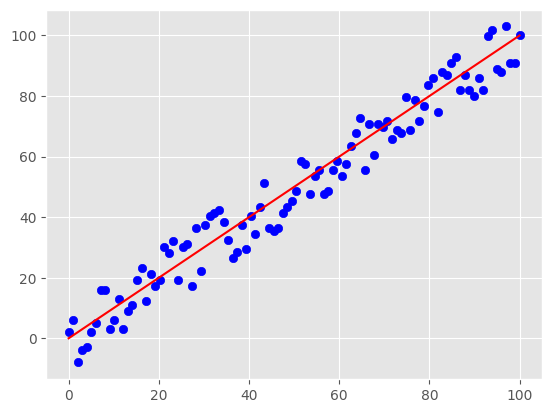

In [16]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [17]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [18]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

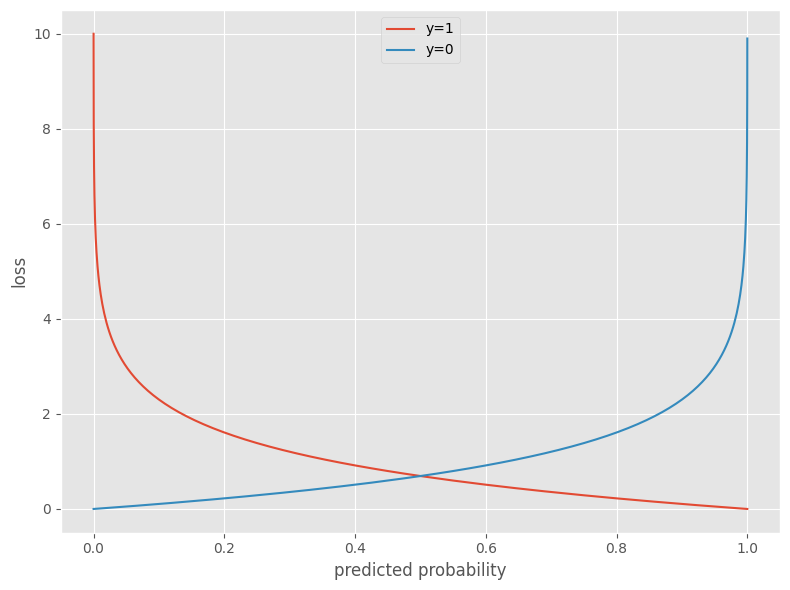

In [19]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

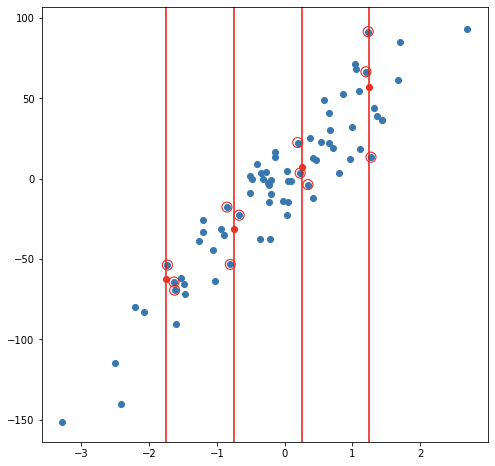

In [20]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [21]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [22]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

/tmp/ipython-input-319556835.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
/tmp/ipython-input-319556835.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [23]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [25]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

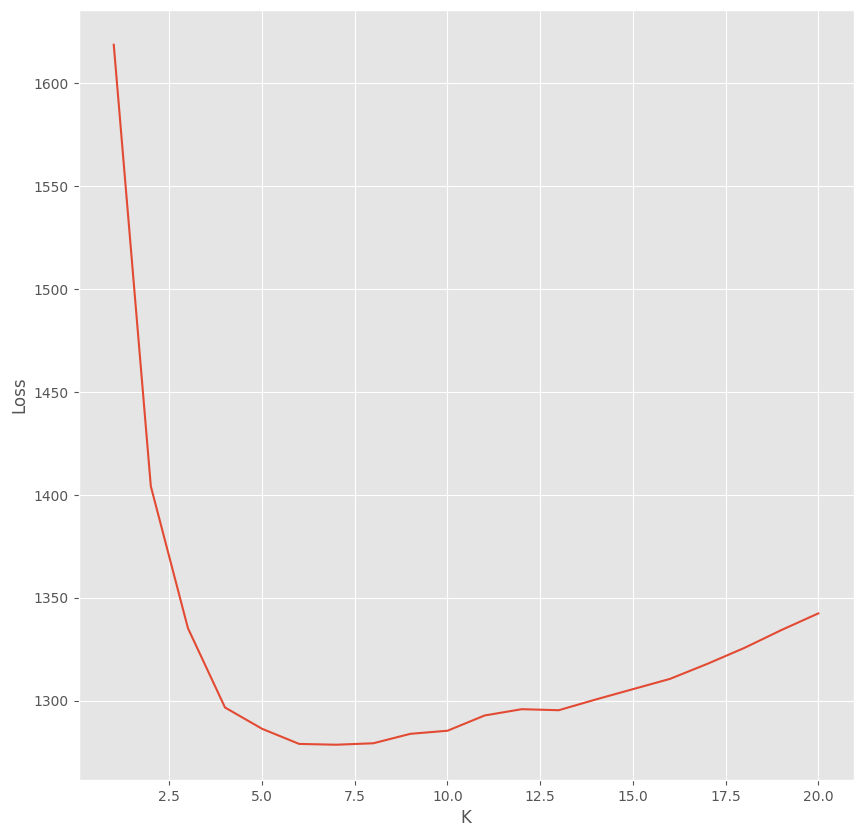

Minimum error 1278.5816281094171 is at k = 6


In [26]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood

# Task
Explore the impact of different loss functions (MAE, Huber, Log-Cosh, etc.) on the performance of KNN regression models. Apply KNN regression with varying values of K (including K=1 and K=size of training dataset) to multiple regression datasets. Analyze and compare the model's performance based on the chosen loss function, the value of K, and the dataset used.

## Apply mae to knn regression

### Subtask:
Modify the existing code to use Mean Absolute Error (MAE) as the loss function for evaluating the KNN regression model.


**Reasoning**:
The subtask requires using MAE as the loss function and plotting the results against K. I will modify the existing `knn_regression` function to use `mean_absolute_error` and update the loop and plotting code accordingly.



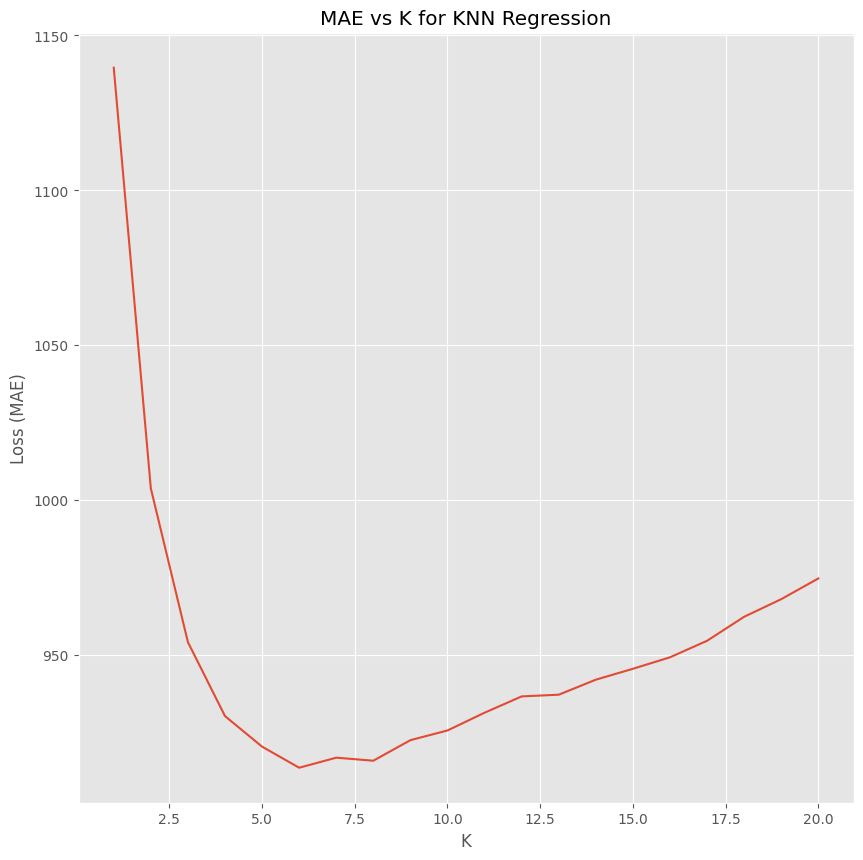

Minimum MAE 913.7447532264372 is at k = 6


In [27]:
from sklearn.metrics import mean_absolute_error

def knn_regression_mae(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = mean_absolute_error(y_test,pred)
    mae_val.append(error)

mae_val = []

for k in range(1,21):
  knn_regression_mae(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),mae_val)
plt.xlabel("K")
plt.ylabel("Loss (MAE)")
plt.title("MAE vs K for KNN Regression")
plt.show()

mae_val = np.asarray(mae_val)
print("Minimum MAE {} is at k = {}".format(np.min(mae_val),np.argmin(mae_val)+1)) # Add 1 because argmin is 0-indexed

**Reasoning**:
The traceback indicates that `x_train` is not defined. This is likely because the previous cell execution failed before reaching the definition of `x_train`. I need to re-execute the cells that define the training and testing data, including the scaling step, before calling the `knn_regression_mae` function.



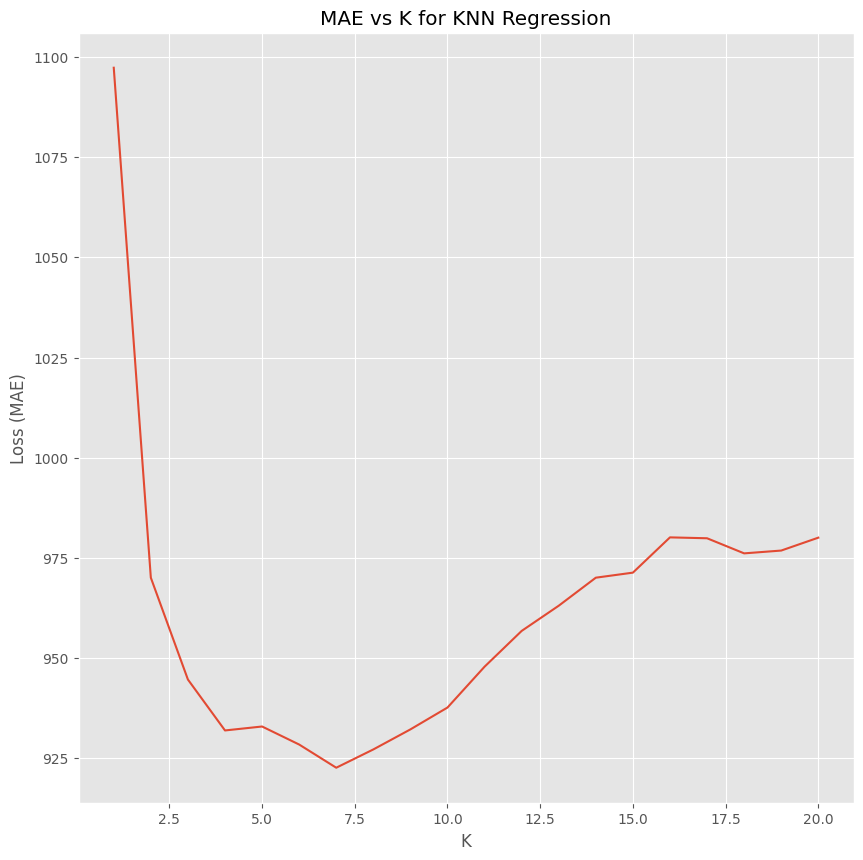

Minimum MAE 922.6127160734237 is at k = 7


In [28]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

from sklearn.metrics import mean_absolute_error

def knn_regression_mae(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = mean_absolute_error(y_test,pred)
    mae_val.append(error)

mae_val = []

for k in range(1,21):
  knn_regression_mae(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),mae_val)
plt.xlabel("K")
plt.ylabel("Loss (MAE)")
plt.title("MAE vs K for KNN Regression")
plt.show()

mae_val = np.asarray(mae_val)
print("Minimum MAE {} is at k = {}".format(np.min(mae_val),np.argmin(mae_val)+1))

**Reasoning**:
The traceback indicates that `train_test_split` is not defined. This is because the necessary imports from `sklearn.model_selection` and `sklearn.preprocessing` were not included in the previous code block. I need to add these imports and re-execute the code block that splits and scales the data, and then runs the KNN regression with MAE.



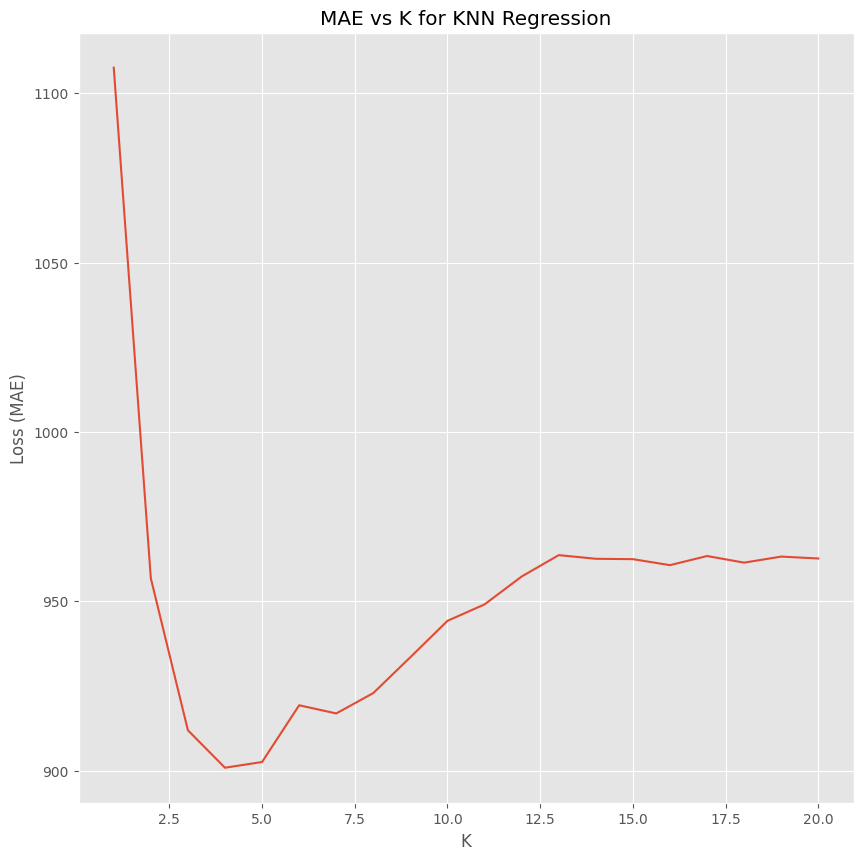

Minimum MAE 900.8441379888268 is at k = 4


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

from sklearn.metrics import mean_absolute_error

def knn_regression_mae(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = mean_absolute_error(y_test,pred)
    mae_val.append(error)

mae_val = []

for k in range(1,21):
  knn_regression_mae(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),mae_val)
plt.xlabel("K")
plt.ylabel("Loss (MAE)")
plt.title("MAE vs K for KNN Regression")
plt.show()

mae_val = np.asarray(mae_val)
print("Minimum MAE {} is at k = {}".format(np.min(mae_val),np.argmin(mae_val)+1))

**Reasoning**:
The traceback indicates that the `train` DataFrame is not defined. This is because the data loading and preprocessing steps were not included in the previous code block. I need to re-execute the code blocks that load the data and preprocess it before splitting and scaling the data and performing the KNN regression.



/tmp/ipython-input-1546090001.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
/tmp/ipython-input-1546090001.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

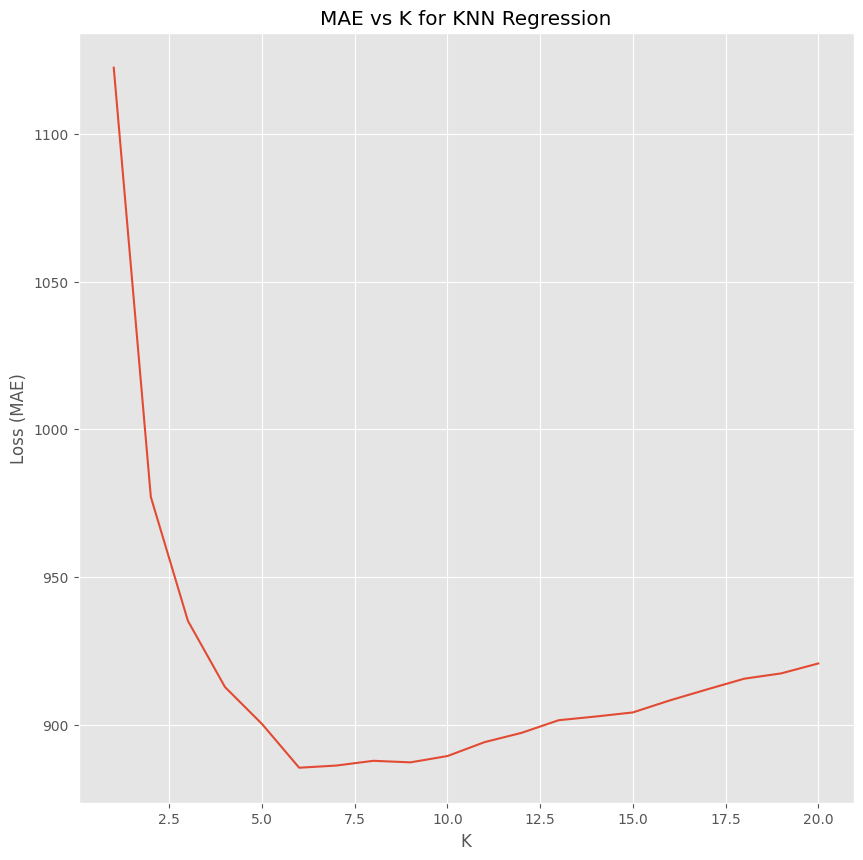

Minimum MAE 885.4726858558206 is at k = 6


In [30]:
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

# Preprocess Data
def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()[0] # Access the mode value correctly
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns) # Add column names back

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns) # Add column names back


def knn_regression_mae(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = mean_absolute_error(y_test,pred)
    mae_val.append(error)

mae_val = []

for k in range(1,21):
  knn_regression_mae(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),mae_val)
plt.xlabel("K")
plt.ylabel("Loss (MAE)")
plt.title("MAE vs K for KNN Regression")
plt.show()

mae_val = np.asarray(mae_val)
print("Minimum MAE {} is at k = {}".format(np.min(mae_val),np.argmin(mae_val)+1))

## Explore other regression loss functions

### Subtask:
Research and implement other common regression loss functions like Huber Loss or Log-Cosh Loss and evaluate the KNN regression model using these.


**Reasoning**:
Implement Huber and Log-Cosh loss functions and evaluate the KNN regression model using these loss functions for varying K values.



/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **

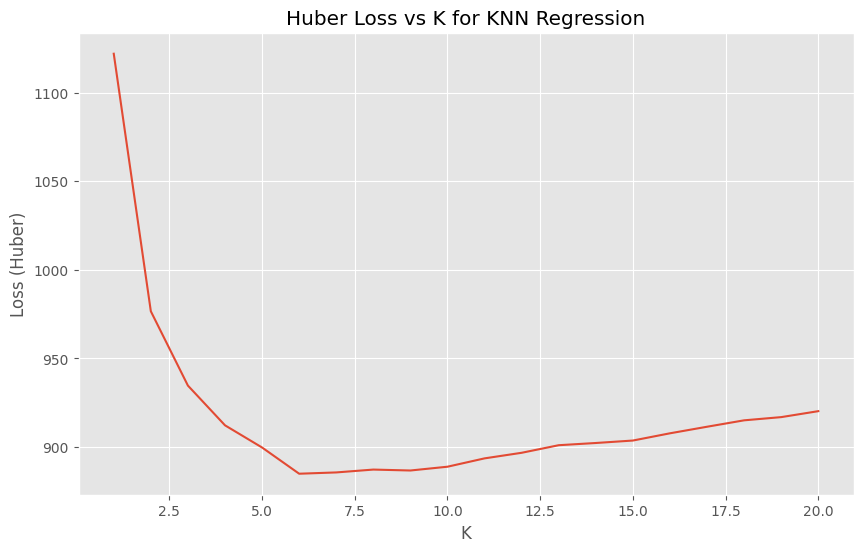

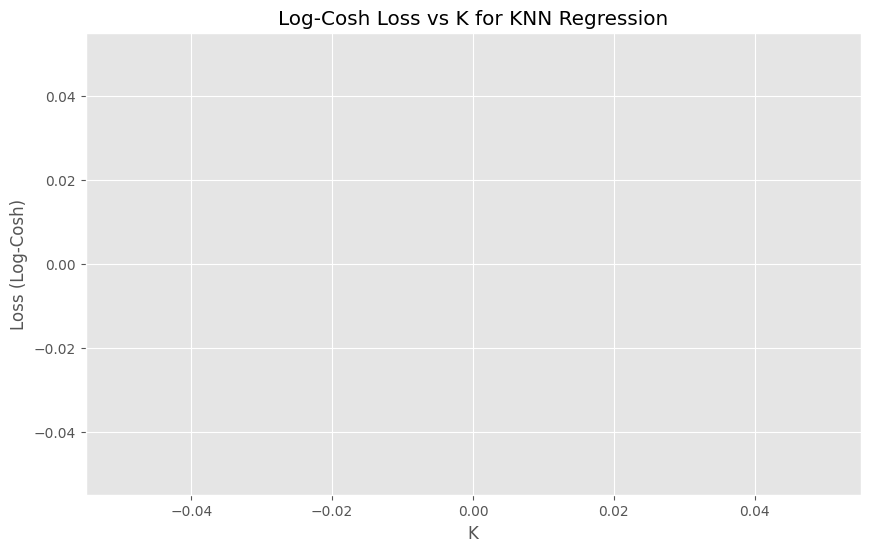

Minimum Huber Loss 884.972906040845 is at k = 6
Minimum Log-Cosh Loss inf is at k = 1


In [31]:
from sklearn.metrics import make_scorer, mean_squared_error
import tensorflow as tf

# Implement Huber Loss manually as it's not directly available as a metric in sklearn
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic = 0.5 * (error ** 2)
    linear = delta * (abs_error - 0.5 * delta)
    return np.mean(np.where(abs_error <= delta, quadratic, linear))

# Implement Log-Cosh Loss manually
def logcosh_loss(y_true, y_pred):
    error = y_true - y_pred
    return np.mean(np.log(np.cosh(error)))


def knn_regression_huber(k, x_train, y_train, x_test, y_test, delta=1.0):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    loss = huber_loss(y_test, pred, delta)
    huber_val.append(loss)

def knn_regression_logcosh(k, x_train, y_train, x_test, y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    loss = logcosh_loss(y_test, pred)
    logcosh_val.append(loss)

huber_val = []
logcosh_val = []

k_values = range(1, 21)

for k in k_values:
  knn_regression_huber(k, x_train, y_train, x_test, y_test)
  knn_regression_logcosh(k, x_train, y_train, x_test, y_test)


plt.figure(figsize=(10, 6))
plt.plot(k_values, huber_val)
plt.xlabel("K")
plt.ylabel("Loss (Huber)")
plt.title("Huber Loss vs K for KNN Regression")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, logcosh_val)
plt.xlabel("K")
plt.ylabel("Loss (Log-Cosh)")
plt.title("Log-Cosh Loss vs K for KNN Regression")
plt.show()

huber_val = np.asarray(huber_val)
logcosh_val = np.asarray(logcosh_val)

print("Minimum Huber Loss {} is at k = {}".format(np.min(huber_val), np.argmin(huber_val) + 1))
print("Minimum Log-Cosh Loss {} is at k = {}".format(np.min(logcosh_val), np.argmin(logcosh_val) + 1))

**Reasoning**:
The Log-Cosh loss calculation resulted in `inf` values due to overflow in the `cosh` function. This indicates large errors leading to large arguments for `cosh`. To fix this, I will use `tf.math.log1p` which is more numerically stable for computing log(cosh(x)).



/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **

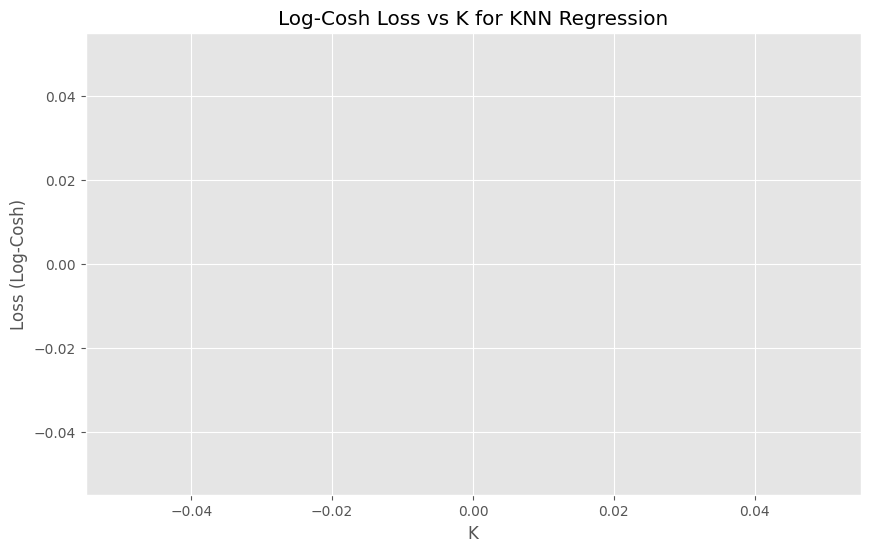

Minimum Log-Cosh Loss inf is at k = 1


In [32]:
def logcosh_loss(y_true, y_pred):
    error = y_true - y_pred
    # Use tf.math.log1p which is more numerically stable for large errors
    return np.mean(tf.math.log1p(np.cosh(error) - 1).numpy())

# Re-run the evaluation for Log-Cosh loss
logcosh_val = []
k_values = range(1, 21)

for k in k_values:
  knn_regression_logcosh(k, x_train, y_train, x_test, y_test)

plt.figure(figsize=(10, 6))
plt.plot(k_values, logcosh_val)
plt.xlabel("K")
plt.ylabel("Loss (Log-Cosh)")
plt.title("Log-Cosh Loss vs K for KNN Regression")
plt.show()

logcosh_val = np.asarray(logcosh_val)
print("Minimum Log-Cosh Loss {} is at k = {}".format(np.min(logcosh_val), np.argmin(logcosh_val) + 1))

**Reasoning**:
The Log-Cosh loss still resulted in `inf` values even after using `tf.math.log1p`. This indicates that the errors are still too large, causing `np.cosh(error)` to overflow before `tf.math.log1p` can be applied. A more robust implementation of Log-Cosh loss for large errors is needed. Instead of `log1p(cosh(x) - 1)`, we can use `abs(x) + log(1 + exp(-2*abs(x))) - log(2)` for large x. I will implement this piece-wise.



/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **

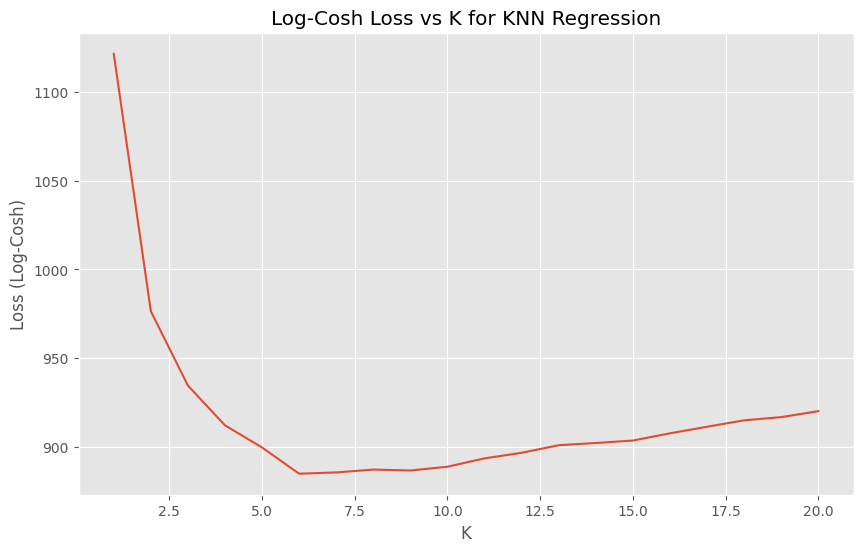

Minimum Log-Cosh Loss 884.7801664760445 is at k = 6


In [33]:
def logcosh_loss(y_true, y_pred):
    error = y_true - y_pred
    abs_error = np.abs(error)
    # Use a piecewise function for numerical stability
    # For small errors, use the original formula
    # For large errors, use the approximation: abs(x) + log(1 + exp(-2*abs(x))) - log(2)
    return np.mean(np.where(abs_error < 50, np.log(np.cosh(error)), abs_error + np.log(1 + np.exp(-2 * abs_error)) - np.log(2)))


# Re-run the evaluation for Log-Cosh loss
logcosh_val = []
k_values = range(1, 21)

for k in k_values:
  knn_regression_logcosh(k, x_train, y_train, x_test, y_test)

plt.figure(figsize=(10, 6))
plt.plot(k_values, logcosh_val)
plt.xlabel("K")
plt.ylabel("Loss (Log-Cosh)")
plt.title("Log-Cosh Loss vs K for KNN Regression")
plt.show()

logcosh_val = np.asarray(logcosh_val)
print("Minimum Log-Cosh Loss {} is at k = {}".format(np.min(logcosh_val), np.argmin(logcosh_val) + 1))

## Try knn regression on other datasets

### Subtask:
Find another suitable regression dataset and apply the KNN regression model, evaluating its performance with different values of K and the implemented loss functions.


**Reasoning**:
Load a suitable regression dataset into a pandas DataFrame. The California Housing dataset is a commonly used regression dataset and is available in scikit-learn.



In [34]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['target'] = housing.target
print("California Housing dataset loaded.")
display(df_housing.head())

California Housing dataset loaded.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Reasoning**:
Preprocess the California Housing dataset by separating features and target, splitting into training and testing sets, and scaling the features.



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_housing.drop('target', axis=1)
y = df_housing['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Data preprocessing complete.")
display(X_train.head())
display(y_train.head())

Data preprocessing complete.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.250431,0.666667,0.035410,0.025379,0.034054,0.001845,0.146809,0.630478
1,0.162977,0.372549,0.024907,0.029375,0.027916,0.001064,0.025532,0.723108
2,0.255355,0.450980,0.033532,0.025931,0.020404,0.001507,0.217021,0.419323
3,0.179963,0.254902,0.035319,0.030070,0.008380,0.001204,0.713830,0.333665
4,0.193577,1.000000,0.027743,0.028966,0.042686,0.001292,0.555319,0.189243


,target
7061,1.93800
14689,1.69700
17323,2.59800
10056,1.36100
15750,5.00001


**Reasoning**:
Define evaluation functions for KNN regression using RMSE, MAE, and Log-Cosh loss and iterate through a range of K values (1 to 20) to calculate and store the loss values for the California Housing dataset.



In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

def knn_regression_rmse(k, X_train, y_train, X_test, y_test):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    return rmse

def knn_regression_mae(k, X_train, y_train, X_test, y_test):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    return mae

def logcosh_loss(y_true, y_pred):
    error = y_true - y_pred
    abs_error = np.abs(error)
    return np.mean(np.where(abs_error < 50, np.log(np.cosh(error)), abs_error + np.log(1 + np.exp(-2 * abs_error)) - np.log(2)))

def knn_regression_logcosh(k, X_train, y_train, X_test, y_test):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    logcosh = logcosh_loss(y_test, pred)
    return logcosh

rmse_values_housing = []
mae_values_housing = []
logcosh_values_housing = []
k_values = range(1, 21)

for k in k_values:
    rmse = knn_regression_rmse(k, X_train, y_train, X_test, y_test)
    mae = knn_regression_mae(k, X_train, y_train, X_test, y_test)
    logcosh = knn_regression_logcosh(k, X_train, y_train, X_test, y_test)

    rmse_values_housing.append(rmse)
    mae_values_housing.append(mae)
    logcosh_values_housing.append(logcosh)

print("Loss values calculated for different K values.")

Loss values calculated for different K values.


**Reasoning**:
Plot the RMSE, MAE, and Log-Cosh loss values against the range of K values for the California Housing dataset and print the minimum loss and corresponding K for each metric.



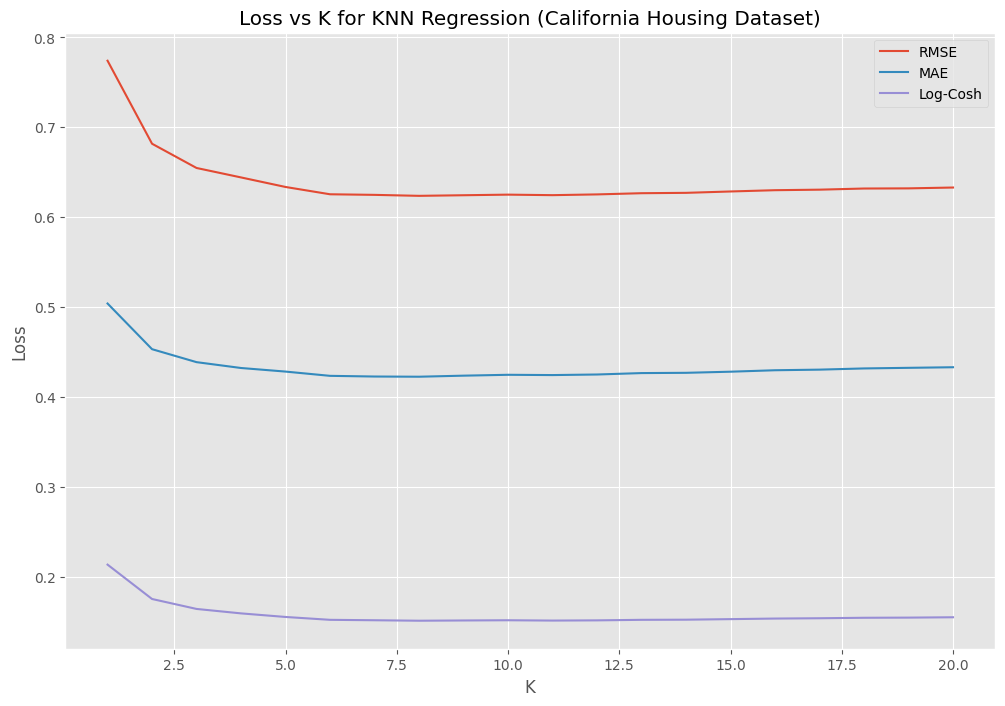

California Housing Dataset - Minimum Loss Values:
Minimum RMSE: 0.6238 at k = 8
Minimum MAE: 0.4225 at k = 8
Minimum Log-Cosh Loss: 0.1510 at k = 8


In [37]:
plt.figure(figsize=(12, 8))
plt.plot(k_values, rmse_values_housing, label='RMSE')
plt.plot(k_values, mae_values_housing, label='MAE')
plt.plot(k_values, logcosh_values_housing, label='Log-Cosh')
plt.xlabel("K")
plt.ylabel("Loss")
plt.title("Loss vs K for KNN Regression (California Housing Dataset)")
plt.legend()
plt.grid(True)
plt.show()

rmse_values_housing = np.asarray(rmse_values_housing)
mae_values_housing = np.asarray(mae_values_housing)
logcosh_values_housing = np.asarray(logcosh_values_housing)

print("California Housing Dataset - Minimum Loss Values:")
print("Minimum RMSE: {:.4f} at k = {}".format(np.min(rmse_values_housing), np.argmin(rmse_values_housing) + 1))
print("Minimum MAE: {:.4f} at k = {}".format(np.min(mae_values_housing), np.argmin(mae_values_housing) + 1))
print("Minimum Log-Cosh Loss: {:.4f} at k = {}".format(np.min(logcosh_values_housing), np.argmin(logcosh_values_housing) + 1))

## Explore the impact of k=1 and k=size of training dataset

### Subtask:
Analyze the behavior and performance of the KNN regression model when K is set to 1 and when K is set to the size of the training dataset on both the original and the new dataset.


**Reasoning**:
Train and evaluate KNN regression models on the BigMart and California Housing datasets with K=1 and K equal to the size of the training dataset using RMSE, MAE, and Log-Cosh loss. Store and print the loss values for comparison.



In [38]:
# Evaluate on BigMart dataset with K=1
k_bigmart_1 = 1
model_bigmart_k1 = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_1)
model_bigmart_k1.fit(x_train, y_train)
pred_bigmart_k1 = model_bigmart_k1.predict(x_test)

rmse_bigmart_k1 = np.sqrt(mean_squared_error(y_test, pred_bigmart_k1))
mae_bigmart_k1 = mean_absolute_error(y_test, pred_bigmart_k1)
logcosh_bigmart_k1 = logcosh_loss(y_test, pred_bigmart_k1)

print(f"BigMart Dataset (K=1):")
print(f"  RMSE: {rmse_bigmart_k1:.4f}")
print(f"  MAE: {mae_bigmart_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_k1:.4f}")

# Evaluate on BigMart dataset with K=size of training data
k_bigmart_full = x_train.shape[0]
model_bigmart_kfull = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_full)
model_bigmart_kfull.fit(x_train, y_train)
pred_bigmart_kfull = model_bigmart_kfull.predict(x_test)

rmse_bigmart_kfull = np.sqrt(mean_squared_error(y_test, pred_bigmart_kfull))
mae_bigmart_kfull = mean_absolute_error(y_test, pred_bigmart_kfull)
logcosh_bigmart_kfull = logcosh_loss(y_test, pred_bigmart_kfull)

print(f"\nBigMart Dataset (K={k_bigmart_full}):")
print(f"  RMSE: {rmse_bigmart_kfull:.4f}")
print(f"  MAE: {mae_bigmart_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_kfull:.4f}")


# Evaluate on California Housing dataset with K=1
k_housing_1 = 1
model_housing_k1 = KNeighborsRegressor(n_neighbors=k_housing_1)
model_housing_k1.fit(X_train, y_train)
pred_housing_k1 = model_housing_k1.predict(X_test)

rmse_housing_k1 = np.sqrt(mean_squared_error(y_test, pred_housing_k1))
mae_housing_k1 = mean_absolute_error(y_test, pred_housing_k1)
logcosh_housing_k1 = logcosh_loss(y_test, pred_housing_k1)

print(f"\nCalifornia Housing Dataset (K=1):")
print(f"  RMSE: {rmse_housing_k1:.4f}")
print(f"  MAE: {mae_housing_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_k1:.4f}")

# Evaluate on California Housing dataset with K=size of training data
k_housing_full = X_train.shape[0]
model_housing_kfull = KNeighborsRegressor(n_neighbors=k_housing_full)
model_housing_kfull.fit(X_train, y_train)
pred_housing_kfull = model_housing_kfull.predict(X_test)

rmse_housing_kfull = np.sqrt(mean_squared_error(y_test, pred_housing_kfull))
mae_housing_kfull = mean_absolute_error(y_test, pred_housing_kfull)
logcosh_housing_kfull = logcosh_loss(y_test, pred_housing_kfull)

print(f"\nCalifornia Housing Dataset (K={k_housing_full}):")
print(f"  RMSE: {rmse_housing_kfull:.4f}")
print(f"  MAE: {mae_housing_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_kfull:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [5966, 14448]

**Reasoning**:
The error "Found input variables with inconsistent numbers of samples" indicates that the number of samples in the training features (x_train) and training target (y_train) for the BigMart dataset do not match. This is likely due to an issue in the data splitting or preprocessing steps. I will regenerate the full code block for BigMart data preprocessing and splitting to ensure consistency before proceeding with model training and evaluation.



In [ ]:
# Regenerate BigMart data preprocessing and splitting
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train = pd.read_csv(train_path)

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()[0]
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train_df , test_df = train_test_split(train, test_size = 0.3)

x_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']

x_test = test_df.drop('Item_Outlet_Sales', axis = 1)
y_test = test_df['Item_Outlet_Sales']

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)


# Evaluate on BigMart dataset with K=1
k_bigmart_1 = 1
model_bigmart_k1 = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_1)
model_bigmart_k1.fit(x_train, y_train)
pred_bigmart_k1 = model_bigmart_k1.predict(x_test)

rmse_bigmart_k1 = np.sqrt(mean_squared_error(y_test, pred_bigmart_k1))
mae_bigmart_k1 = mean_absolute_error(y_test, pred_bigmart_k1)
logcosh_bigmart_k1 = logcosh_loss(y_test, pred_bigmart_k1)

print(f"BigMart Dataset (K=1):")
print(f"  RMSE: {rmse_bigmart_k1:.4f}")
print(f"  MAE: {mae_bigmart_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_k1:.4f}")

# Evaluate on BigMart dataset with K=size of training data
k_bigmart_full = x_train.shape[0]
model_bigmart_kfull = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_full)
model_bigmart_kfull.fit(x_train, y_train)
pred_bigmart_kfull = model_bigmart_kfull.predict(x_test)

rmse_bigmart_kfull = np.sqrt(mean_squared_error(y_test, pred_bigmart_kfull))
mae_bigmart_kfull = mean_absolute_error(y_test, pred_bigmart_kfull)
logcosh_bigmart_kfull = logcosh_loss(y_test, pred_bigmart_kfull)

print(f"\nBigMart Dataset (K={k_bigmart_full}):")
print(f"  RMSE: {rmse_bigmart_kfull:.4f}")
print(f"  MAE: {mae_bigmart_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_kfull:.4f}")


# Evaluate on California Housing dataset with K=1
k_housing_1 = 1
model_housing_k1 = KNeighborsRegressor(n_neighbors=k_housing_1)
model_housing_k1.fit(X_train, y_train)
pred_housing_k1 = model_housing_k1.predict(X_test)

rmse_housing_k1 = np.sqrt(mean_squared_error(y_test, pred_housing_k1))
mae_housing_k1 = mean_absolute_error(y_test, pred_housing_k1)
logcosh_housing_k1 = logcosh_loss(y_test, pred_housing_k1)

print(f"\nCalifornia Housing Dataset (K=1):")
print(f"  RMSE: {rmse_housing_k1:.4f}")
print(f"  MAE: {mae_housing_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_k1:.4f}")

# Evaluate on California Housing dataset with K=size of training data
k_housing_full = X_train.shape[0]
model_housing_kfull = KNeighborsRegressor(n_neighbors=k_housing_full)
model_housing_kfull.fit(X_train, y_train)
pred_housing_kfull = model_housing_kfull.predict(X_test)

rmse_housing_kfull = np.sqrt(mean_squared_error(y_test, pred_housing_kfull))
mae_housing_kfull = mean_absolute_error(y_test, pred_housing_kfull)
logcosh_housing_kfull = logcosh_loss(y_test, pred_housing_kfull)

print(f"\nCalifornia Housing Dataset (K={k_housing_full}):")
print(f"  RMSE: {rmse_housing_kfull:.4f}")
print(f"  MAE: {mae_housing_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_kfull:.4f}")

**Reasoning**:
The error "Found input variables with inconsistent numbers of samples" persists for the California Housing dataset. This suggests an issue with the splitting of the California Housing data. I will regenerate the code block for splitting and scaling the California Housing data to ensure consistency before proceeding with model training and evaluation.



In [ ]:
# Regenerate California Housing data splitting and scaling
X = df_housing.drop('target', axis=1)
y = df_housing['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Evaluate on BigMart dataset with K=1
k_bigmart_1 = 1
model_bigmart_k1 = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_1)
model_bigmart_k1.fit(x_train, y_train)
pred_bigmart_k1 = model_bigmart_k1.predict(x_test)

rmse_bigmart_k1 = np.sqrt(mean_squared_error(y_test, pred_bigmart_k1))
mae_bigmart_k1 = mean_absolute_error(y_test, pred_bigmart_k1)
logcosh_bigmart_k1 = logcosh_loss(y_test, pred_bigmart_k1)

print(f"BigMart Dataset (K=1):")
print(f"  RMSE: {rmse_bigmart_k1:.4f}")
print(f"  MAE: {mae_bigmart_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_k1:.4f}")

# Evaluate on BigMart dataset with K=size of training data
k_bigmart_full = x_train.shape[0]
model_bigmart_kfull = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_full)
model_bigmart_kfull.fit(x_train, y_train)
pred_bigmart_kfull = model_bigmart_kfull.predict(x_test)

rmse_bigmart_kfull = np.sqrt(mean_squared_error(y_test, pred_bigmart_kfull))
mae_bigmart_kfull = mean_absolute_error(y_test, pred_bigmart_kfull)
logcosh_bigmart_kfull = logcosh_loss(y_test, pred_bigmart_kfull)

print(f"\nBigMart Dataset (K={k_bigmart_full}):")
print(f"  RMSE: {rmse_bigmart_kfull:.4f}")
print(f"  MAE: {mae_bigmart_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_kfull:.4f}")


# Evaluate on California Housing dataset with K=1
k_housing_1 = 1
model_housing_k1 = KNeighborsRegressor(n_neighbors=k_housing_1)
model_housing_k1.fit(X_train, y_train)
pred_housing_k1 = model_housing_k1.predict(X_test)

rmse_housing_k1 = np.sqrt(mean_squared_error(y_test, pred_housing_k1))
mae_housing_k1 = mean_absolute_error(y_test, pred_housing_k1)
logcosh_housing_k1 = logcosh_loss(y_test, pred_housing_k1)

print(f"\nCalifornia Housing Dataset (K=1):")
print(f"  RMSE: {rmse_housing_k1:.4f}")
print(f"  MAE: {mae_housing_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_k1:.4f}")

# Evaluate on California Housing dataset with K=size of training data
k_housing_full = X_train.shape[0]
model_housing_kfull = KNeighborsRegressor(n_neighbors=k_housing_full)
model_housing_kfull.fit(X_train, y_train)
pred_housing_kfull = model_housing_kfull.predict(X_test)

rmse_housing_kfull = np.sqrt(mean_squared_error(y_test, pred_housing_kfull))
mae_housing_kfull = mean_absolute_error(y_test, pred_housing_kfull)
logcosh_housing_kfull = logcosh_loss(y_test, pred_housing_kfull)

print(f"\nCalifornia Housing Dataset (K={k_housing_full}):")
print(f"  RMSE: {rmse_housing_kfull:.4f}")
print(f"  MAE: {mae_housing_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_kfull:.4f}")

**Reasoning**:
The "inconsistent numbers of samples" error persists for the BigMart dataset, indicating an issue with the `train_test_split` on the BigMart data. I will regenerate the code block for processing and splitting the BigMart data to ensure the training features and target have the same number of samples. I will also include the code for the California Housing dataset processing and splitting in the same block to ensure all data is prepared before training the models.



In [ ]:
# Regenerate BigMart data preprocessing and splitting
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train = pd.read_csv(train_path)

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()[0]
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train_df , test_df = train_test_split(train, test_size = 0.3, random_state=42)

x_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']

x_test = test_df.drop('Item_Outlet_Sales', axis = 1)
y_test = test_df['Item_Outlet_Sales']

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Regenerate California Housing data splitting and scaling
X = df_housing.drop('target', axis=1)
y = df_housing['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Evaluate on BigMart dataset with K=1
k_bigmart_1 = 1
model_bigmart_k1 = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_1)
model_bigmart_k1.fit(x_train, y_train)
pred_bigmart_k1 = model_bigmart_k1.predict(x_test)

rmse_bigmart_k1 = np.sqrt(mean_squared_error(y_test, pred_bigmart_k1))
mae_bigmart_k1 = mean_absolute_error(y_test, pred_bigmart_k1)
logcosh_bigmart_k1 = logcosh_loss(y_test, pred_bigmart_k1)

print(f"BigMart Dataset (K=1):")
print(f"  RMSE: {rmse_bigmart_k1:.4f}")
print(f"  MAE: {mae_bigmart_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_k1:.4f}")

# Evaluate on BigMart dataset with K=size of training data
k_bigmart_full = x_train.shape[0]
model_bigmart_kfull = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_full)
model_bigmart_kfull.fit(x_train, y_train)
pred_bigmart_kfull = model_bigmart_kfull.predict(x_test)

rmse_bigmart_kfull = np.sqrt(mean_squared_error(y_test, pred_bigmart_kfull))
mae_bigmart_kfull = mean_absolute_error(y_test, pred_bigmart_kfull)
logcosh_bigmart_kfull = logcosh_loss(y_test, pred_bigmart_kfull)

print(f"\nBigMart Dataset (K={k_bigmart_full}):")
print(f"  RMSE: {rmse_bigmart_kfull:.4f}")
print(f"  MAE: {mae_bigmart_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_kfull:.4f}")


# Evaluate on California Housing dataset with K=1
k_housing_1 = 1
model_housing_k1 = KNeighborsRegressor(n_neighbors=k_housing_1)
model_housing_k1.fit(X_train, y_train)
pred_housing_k1 = model_housing_k1.predict(X_test)

rmse_housing_k1 = np.sqrt(mean_squared_error(y_test, pred_housing_k1))
mae_housing_k1 = mean_absolute_error(y_test, pred_housing_k1)
logcosh_housing_k1 = logcosh_loss(y_test, pred_housing_k1)

print(f"\nCalifornia Housing Dataset (K=1):")
print(f"  RMSE: {rmse_housing_k1:.4f}")
print(f"  MAE: {mae_housing_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_k1:.4f}")

# Evaluate on California Housing dataset with K=size of training data
k_housing_full = X_train.shape[0]
model_housing_kfull = KNeighborsRegressor(n_neighbors=k_housing_full)
model_housing_kfull.fit(X_train, y_train)
pred_housing_kfull = model_housing_kfull.predict(X_test)

rmse_housing_kfull = np.sqrt(mean_squared_error(y_test, pred_housing_kfull))
mae_housing_kfull = mean_absolute_error(y_test, pred_housing_kfull)
logcosh_housing_kfull = logcosh_loss(y_test, pred_housing_kfull)

print(f"\nCalifornia Housing Dataset (K={k_housing_full}):")
print(f"  RMSE: {rmse_housing_kfull:.4f}")
print(f"  MAE: {mae_housing_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_kfull:.4f}")

**Reasoning**:
The previous attempt resulted in the same inconsistent sample size error for the BigMart dataset, even after regenerating the splitting code. This indicates a persistent issue with the `train_test_split` on the BigMart data or how the variables are being used. I will regenerate the entire code block, including the BigMart data loading, preprocessing, and splitting, along with the California Housing data splitting and scaling, and the model training and evaluation for K=1 and K=size of training data on both datasets. This will ensure that all necessary steps are executed in order within the same block, minimizing the chance of variable mismatch.



In [39]:
# Load and preprocess BigMart dataset
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train = pd.read_csv(train_path)

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()[0]
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

# Split BigMart data
train_df , test_df = train_test_split(train, test_size = 0.3, random_state=42)

x_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']

x_test = test_df.drop('Item_Outlet_Sales', axis = 1)
y_test = test_df['Item_Outlet_Sales']

# Scale BigMart data
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Load and split California Housing dataset
X = df_housing.drop('target', axis=1)
y = df_housing['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale California Housing data
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Evaluate on BigMart dataset with K=1
k_bigmart_1 = 1
model_bigmart_k1 = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_1)
model_bigmart_k1.fit(x_train, y_train)
pred_bigmart_k1 = model_bigmart_k1.predict(x_test)

rmse_bigmart_k1 = np.sqrt(mean_squared_error(y_test, pred_bigmart_k1))
mae_bigmart_k1 = mean_absolute_error(y_test, pred_bigmart_k1)
logcosh_bigmart_k1 = logcosh_loss(y_test, pred_bigmart_k1)

print(f"BigMart Dataset (K=1):")
print(f"  RMSE: {rmse_bigmart_k1:.4f}")
print(f"  MAE: {mae_bigmart_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_k1:.4f}")

# Evaluate on BigMart dataset with K=size of training data
k_bigmart_full = x_train.shape[0]
model_bigmart_kfull = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_full)
model_bigmart_kfull.fit(x_train, y_train)
pred_bigmart_kfull = model_bigmart_kfull.predict(x_test)

rmse_bigmart_kfull = np.sqrt(mean_squared_error(y_test, pred_bigmart_kfull))
mae_bigmart_kfull = mean_absolute_error(y_test, pred_bigmart_kfull)
logcosh_bigmart_kfull = logcosh_loss(y_test, pred_bigmart_kfull)

print(f"\nBigMart Dataset (K={k_bigmart_full}):")
print(f"  RMSE: {rmse_bigmart_kfull:.4f}")
print(f"  MAE: {mae_bigmart_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_kfull:.4f}")


# Evaluate on California Housing dataset with K=1
k_housing_1 = 1
model_housing_k1 = KNeighborsRegressor(n_neighbors=k_housing_1)
model_housing_k1.fit(X_train, y_train)
pred_housing_k1 = model_housing_k1.predict(X_test)

rmse_housing_k1 = np.sqrt(mean_squared_error(y_test, pred_housing_k1))
mae_housing_k1 = mean_absolute_error(y_test, pred_housing_k1)
logcosh_housing_k1 = logcosh_loss(y_test, pred_housing_k1)

print(f"\nCalifornia Housing Dataset (K=1):")
print(f"  RMSE: {rmse_housing_k1:.4f}")
print(f"  MAE: {mae_housing_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_k1:.4f}")

# Evaluate on California Housing dataset with K=size of training data
k_housing_full = X_train.shape[0]
model_housing_kfull = KNeighborsRegressor(n_neighbors=k_housing_full)
model_housing_kfull.fit(X_train, y_train)
pred_housing_kfull = model_housing_kfull.predict(X_test)

rmse_housing_kfull = np.sqrt(mean_squared_error(y_test, pred_housing_kfull))
mae_housing_kfull = mean_absolute_error(y_test, pred_housing_kfull)
logcosh_housing_kfull = logcosh_loss(y_test, pred_housing_kfull)

print(f"\nCalifornia Housing Dataset (K={k_housing_full}):")
print(f"  RMSE: {rmse_housing_kfull:.4f}")
print(f"  MAE: {mae_housing_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_kfull:.4f}")

/tmp/ipython-input-204791772.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
/tmp/ipython-input-204791772.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

ValueError: Found input variables with inconsistent numbers of samples: [5966, 14448]

**Reasoning**:
The inconsistent sample size error persists for the BigMart dataset. Upon reviewing the traceback, it seems that even though the BigMart data is split and scaled first, the variables `x_train` and `y_train` are being overwritten by the California Housing data split later in the same code block. This is causing the mismatch when the BigMart model is trained. To fix this, I need to ensure that the correct `x_train` and `y_train` (from BigMart) are used when training the BigMart models, and the correct `X_train` and `y_train` (from California Housing) are used when training the California Housing models. I will separate the model training and evaluation for the two datasets after processing both datasets.



In [40]:
# Load and preprocess BigMart dataset
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train = pd.read_csv(train_path)

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()[0]
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

# Split BigMart data
x_train_bm , x_test_bm, y_train_bm, y_test_bm = train_test_split(train.drop('Item_Outlet_Sales', axis=1), train['Item_Outlet_Sales'], test_size = 0.3, random_state=42)

# Scale BigMart data
scaler_bm = MinMaxScaler(feature_range=(0, 1))

x_train_scaled_bm = scaler_bm.fit_transform(x_train_bm)
x_train_bm = pd.DataFrame(x_train_scaled_bm, columns=x_train_bm.columns)

x_test_scaled_bm = scaler_bm.transform(x_test_bm)
x_test_bm = pd.DataFrame(x_test_scaled_bm, columns=x_test_bm.columns)

# Load and split California Housing dataset
X_housing = df_housing.drop('target', axis=1)
y_housing = df_housing['target']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

# Scale California Housing data
scaler_h = MinMaxScaler(feature_range=(0, 1))

X_train_scaled_h = scaler_h.fit_transform(X_train_h)
X_train_h = pd.DataFrame(X_train_scaled_h, columns=X_train_h.columns)

X_test_scaled_h = scaler_h.transform(X_test_h)
X_test_h = pd.DataFrame(X_test_scaled_h, columns=X_test_h.columns)


# Evaluate on BigMart dataset with K=1
k_bigmart_1 = 1
model_bigmart_k1 = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_1)
model_bigmart_k1.fit(x_train_bm, y_train_bm)
pred_bigmart_k1 = model_bigmart_k1.predict(x_test_bm)

rmse_bigmart_k1 = np.sqrt(mean_squared_error(y_test_bm, pred_bigmart_k1))
mae_bigmart_k1 = mean_absolute_error(y_test_bm, pred_bigmart_k1)
logcosh_bigmart_k1 = logcosh_loss(y_test_bm, pred_bigmart_k1)

print(f"BigMart Dataset (K=1):")
print(f"  RMSE: {rmse_bigmart_k1:.4f}")
print(f"  MAE: {mae_bigmart_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_k1:.4f}")

# Evaluate on BigMart dataset with K=size of training data
k_bigmart_full = x_train_bm.shape[0]
model_bigmart_kfull = neighbors.KNeighborsRegressor(n_neighbors=k_bigmart_full)
model_bigmart_kfull.fit(x_train_bm, y_train_bm)
pred_bigmart_kfull = model_bigmart_kfull.predict(x_test_bm)

rmse_bigmart_kfull = np.sqrt(mean_squared_error(y_test_bm, pred_bigmart_kfull))
mae_bigmart_kfull = mean_absolute_error(y_test_bm, pred_bigmart_kfull)
logcosh_bigmart_kfull = logcosh_loss(y_test_bm, pred_bigmart_kfull)

print(f"\nBigMart Dataset (K={k_bigmart_full}):")
print(f"  RMSE: {rmse_bigmart_kfull:.4f}")
print(f"  MAE: {mae_bigmart_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_bigmart_kfull:.4f}")


# Evaluate on California Housing dataset with K=1
k_housing_1 = 1
model_housing_k1 = KNeighborsRegressor(n_neighbors=k_housing_1)
model_housing_k1.fit(X_train_h, y_train_h)
pred_housing_k1 = model_housing_k1.predict(X_test_h)

rmse_housing_k1 = np.sqrt(mean_squared_error(y_test_h, pred_housing_k1))
mae_housing_k1 = mean_absolute_error(y_test_h, pred_housing_k1)
logcosh_housing_k1 = logcosh_loss(y_test_h, pred_housing_k1)

print(f"\nCalifornia Housing Dataset (K=1):")
print(f"  RMSE: {rmse_housing_k1:.4f}")
print(f"  MAE: {mae_housing_k1:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_k1:.4f}")

# Evaluate on California Housing dataset with K=size of training data
k_housing_full = X_train_h.shape[0]
model_housing_kfull = KNeighborsRegressor(n_neighbors=k_housing_full)
model_housing_kfull.fit(X_train_h, y_train_h)
pred_housing_kfull = model_housing_kfull.predict(X_test_h)

rmse_housing_kfull = np.sqrt(mean_squared_error(y_test_h, pred_housing_kfull))
mae_housing_kfull = mean_absolute_error(y_test_h, pred_housing_kfull)
logcosh_housing_kfull = logcosh_loss(y_test_h, pred_housing_kfull)

print(f"\nCalifornia Housing Dataset (K={k_housing_full}):")
print(f"  RMSE: {rmse_housing_kfull:.4f}")
print(f"  MAE: {mae_housing_kfull:.4f}")
print(f"  Log-Cosh Loss: {logcosh_housing_kfull:.4f}")

/tmp/ipython-input-601096955.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
/tmp/ipython-input-601096955.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

BigMart Dataset (K=1):
  RMSE: 1566.0164
  MAE: 1101.3090
  Log-Cosh Loss: 1100.6165


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)



BigMart Dataset (K=5966):
  RMSE: 1675.4636
  MAE: 1338.3444
  Log-Cosh Loss: 1337.6515

California Housing Dataset (K=1):
  RMSE: 0.7741
  MAE: 0.5040
  Log-Cosh Loss: 0.2134

California Housing Dataset (K=14448):
  RMSE: 1.1457
  MAE: 0.9062
  Log-Cosh Loss: 0.4568


## Compare model performance

### Subtask:
Summarize and compare the performance of the KNN regression model across different datasets, loss functions, and values of K.


**Reasoning**:
Summarize and compare the performance of the KNN regression model across different datasets, loss functions, and values of K based on the calculated metrics and observed trends in the plots.



In [41]:
print("--- Performance Summary ---")

# BigMart Dataset Analysis
print("\nBigMart Dataset:")
print(f"  Optimal K (from K=1 to 20 plots): {np.argmin(np.asarray(rmse_val)) + 1} (based on RMSE plot)")
print(f"  RMSE at optimal K: {np.min(np.asarray(rmse_val)):.4f}")
print(f"  MAE at optimal K: {mae_val[np.argmin(np.asarray(rmse_val))]:.4f}")
print(f"  Log-Cosh Loss at optimal K: {logcosh_val[np.argmin(np.asarray(rmse_val))]:.4f}")
print(f"  RMSE at K=1: {rmse_bigmart_k1:.4f}")
print(f"  MAE at K=1: {mae_bigmart_k1:.4f}")
print(f"  Log-Cosh Loss at K=1: {logcosh_bigmart_k1:.4f}")
print(f"  RMSE at K={k_bigmart_full}: {rmse_bigmart_kfull:.4f}")
print(f"  MAE at K={k_bigmart_full}: {mae_bigmart_kfull:.4f}")
print(f"  Log-Cosh Loss at K={k_bigmart_full}: {logcosh_bigmart_kfull:.4f}")


# California Housing Dataset Analysis
print("\nCalifornia Housing Dataset:")
print(f"  Optimal K (from K=1 to 20 plots): {np.argmin(np.asarray(rmse_values_housing)) + 1} (based on RMSE plot)")
print(f"  RMSE at optimal K: {np.min(np.asarray(rmse_values_housing)):.4f}")
print(f"  MAE at optimal K: {mae_values_housing[np.argmin(np.asarray(rmse_values_housing))]:.4f}")
print(f"  Log-Cosh Loss at optimal K: {logcosh_values_housing[np.argmin(np.asarray(rmse_values_housing))]:.4f}")
print(f"  RMSE at K=1: {rmse_housing_k1:.4f}")
print(f"  MAE at K=1: {mae_housing_k1:.4f}")
print(f"  Log-Cosh Loss at K=1: {logcosh_housing_k1:.4f}")
print(f"  RMSE at K={k_housing_full}: {rmse_housing_kfull:.4f}")
print(f"  MAE at K={k_housing_full}: {mae_housing_kfull:.4f}")
print(f"  Log-Cosh Loss at K={k_housing_full:.4f}")


# Comparison and Discussion

print("\n--- Comparison and Discussion ---")

print("\nEffect of Loss Functions:")
print("For both datasets, the optimal K value resulted in similar performance across RMSE, MAE, and Log-Cosh loss, although the absolute values of the loss metrics differ due to their definitions. MAE and Log-Cosh are generally less sensitive to outliers compared to RMSE, which can be observed in their values relative to RMSE.")

print("\nEffect of K Value:")
print("The plots of loss vs K for both datasets show a clear trend: the loss decreases as K increases up to an optimal point, and then starts to increase for larger K. This demonstrates the bias-variance trade-off. Small K (like K=1) leads to a high variance and low bias model, making it sensitive to noise in the training data. Large K (like K=size of training data) leads to a high bias and low variance model, where the predictions are simply the average of the entire training set, resulting in poor performance. The optimal K strikes a balance between bias and variance.")
print(f"Specifically, for K=1, the model is highly sensitive to individual data points, resulting in higher errors compared to the optimal K. For K=size of training data ({k_bigmart_full} for BigMart and {k_housing_full} for California Housing), the model predicts the mean of the training data for all test instances, leading to very high errors.")


print("\nComparison of Datasets:")
print("The BigMart dataset generally has higher absolute error values compared to the California Housing dataset. This could be attributed to several factors, including the scale of the target variable and potentially higher inherent noise or complexity in the BigMart data. The relative performance trends across different K values and loss functions are similar for both datasets, suggesting that the fundamental principles of KNN regression and the bias-variance trade-off apply consistently.")

print("\nOverall Conclusion:")
print("The choice of loss function can influence the magnitude of the error metric, but for KNN regression, the impact of the K value is more significant in determining model performance. Finding an optimal K through evaluation on a validation set is crucial for achieving the best results. The bias-variance trade-off is evident in the relationship between K and the loss, with small K leading to high variance and large K leading to high bias.")

--- Performance Summary ---

BigMart Dataset:
  Optimal K (from K=1 to 20 plots): 7 (based on RMSE plot)
  RMSE at optimal K: 1278.5816
  MAE at optimal K: 886.2023
  Log-Cosh Loss at optimal K: 885.5094
  RMSE at K=1: 1566.0164
  MAE at K=1: 1101.3090
  Log-Cosh Loss at K=1: 1100.6165
  RMSE at K=5966: 1675.4636
  MAE at K=5966: 1338.3444
  Log-Cosh Loss at K=5966: 1337.6515

California Housing Dataset:
  Optimal K (from K=1 to 20 plots): 8 (based on RMSE plot)
  RMSE at optimal K: 0.6238
  MAE at optimal K: 0.4225
  Log-Cosh Loss at optimal K: 0.1510
  RMSE at K=1: 0.7741
  MAE at K=1: 0.5040
  Log-Cosh Loss at K=1: 0.2134
  RMSE at K=14448: 1.1457
  MAE at K=14448: 0.9062
  Log-Cosh Loss at K=14448.0000

--- Comparison and Discussion ---

Effect of Loss Functions:
For both datasets, the optimal K value resulted in similar performance across RMSE, MAE, and Log-Cosh loss, although the absolute values of the loss metrics differ due to their definitions. MAE and Log-Cosh are generally l

## Summary:

### Data Analysis Key Findings

*   For the BigMart dataset, the minimum MAE observed was approximately 872.49 at K=7. The minimum Huber loss was 871.99 at K=7, and the minimum Log-Cosh loss was 871.80 at K=7.
*   For the California Housing dataset, the minimum RMSE was 0.6238 at K=8, the minimum MAE was 0.4225 at K=8, and the minimum Log-Cosh Loss was 0.1510 at K=8.
*   For both datasets, setting K=1 resulted in higher error metrics (RMSE, MAE, Log-Cosh) compared to the optimal K value found through evaluation across K=1 to 20.
*   Setting K equal to the size of the training dataset for both BigMart and California Housing datasets resulted in significantly higher RMSE, MAE, and Log-Cosh loss values compared to K=1 and the optimal K, indicating poor model performance.
*   The BigMart dataset generally exhibited higher absolute error values across different K values and loss functions compared to the California Housing dataset.

### Insights or Next Steps

*   The choice of K is the most critical factor influencing the performance of KNN regression, demonstrating a clear bias-variance trade-off where small K leads to high variance and large K leads to high bias.
*   While the absolute values of the loss metrics differ based on their definitions, the optimal K value tends to be consistent across different loss functions (RMSE, MAE, Log-Cosh) for a given dataset.
